In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [21]:
# load my curves
my_curver_rej = np.load("/home/users/o/oleksiyu/WORK/hyperproject/TT_reco_cons0.001_smls0.0001_advII6S4s_LCRF_2048b_lr2-4_dl/plots/compare/TwinTurbo_rejection_v_TPR_comb_seeds_CWOLA.npy")
my_curve_sic = np.load("/home/users/o/oleksiyu/WORK/hyperproject/TT_reco_cons0.001_smls0.0001_advII6S4s_LCRF_2048b_lr2-4_dl/plots/compare/TwinTurbo_SI_v_rej_comb_seeds_CWOLA.npy")
print(my_curver_rej)


[[0.00000000e+00 1.32803888e-05 3.98411665e-05 ... 9.99973439e-01
  9.99986720e-01 1.00000000e+00]
 [           inf            inf            inf ... 1.00026882e+00
  1.00019296e+00 1.00000000e+00]
 [           nan            nan            nan ... 2.31953982e-04
  2.15756339e-04 0.00000000e+00]]


In [59]:
# load CURTAINSF4F
npy_file =  "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_0/rejection_v_TPR.npy"
curtains_rej = np.load(npy_file)
npy_file =  "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_0/SI_v_rej.npy"
curtains_sic = np.load(npy_file)

In [ ]:
# curtains_rej =[]
# npy_files =  ["/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_0/rejection_v_TPR.npy",
#               "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_1/rejection_v_TPR.npy",
#                 "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_2/rejection_v_TPR.npy",
#                 "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_3/rejection_v_TPR.npy",
#                 "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_4/rejection_v_TPR.npy"]
# for npy_file in npy_files:
#     curtains_rej.append(np.load(npy_file))

# #curtains_rej = np.concatenate([curtains_rej, axis=1)
# print(curtains_rej)
# npy_files =  ["/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_0/SI_v_rej.npy",
#                 "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_1/SI_v_rej.npy",
#                     "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_2/SI_v_rej.npy",
#                     "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_3/SI_v_rej.npy",
#                     "/home/users/o/oleksiyu/WORK/hyperproject/lit/curtains/run_8/seed_4/SI_v_rej.npy"]
# curtains_sic =[]
# for npy_file in npy_files:
#     curtains_sic.append(np.load(npy_file))


In [31]:
# Load supervised 
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/radot_rej_3000.csv'
# Load the CSV file
radot1 = pd.read_csv(csv_file_path)
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/radot_tpr_3000.csv'
# Load the CSV file
radot2 = pd.read_csv(csv_file_path)
# Display the first few rows of the dataframe
print(radot1.head())

        tpr    rej_up  rej_center  rej_down
0  0.000000  121339.0    121339.0  121339.0
1  0.001001  121339.0    121339.0  121339.0
2  0.002002  121339.0    121339.0  121339.0
3  0.003003  121339.0    121339.0  121339.0
4  0.004004  121339.0    121339.0  121339.0


In [42]:
# Load Idealised 
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/for_ivan/rej_vs_tpr_3000_idealised.csv'
ideal_rej = pd.read_csv(csv_file_path)
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/for_ivan/sic_vs_reg_3000_idealised.csv'
ideal_sic = pd.read_csv(csv_file_path)

In [43]:
# load RADOT curves
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/for_ivan/rej_vs_tpr_3000_supervised.csv'
# Load the CSV file
super_rej = pd.read_csv(csv_file_path)
csv_file_path = '/srv/beegfs/scratch/groups/rodem/oliws/for_ivan/sic_vs_reg_3000_supervised.csv'
# Load the CSV file
super_sic = pd.read_csv(csv_file_path)
# Display the first few rows of the dataframe
print(radot1.head())

        tpr    rej_up  rej_center  rej_down
0  0.000000  121339.0    121339.0  121339.0
1  0.001001  121339.0    121339.0  121339.0
2  0.002002  121339.0    121339.0  121339.0
3  0.003003  121339.0    121339.0  121339.0
4  0.004004  121339.0    121339.0  121339.0


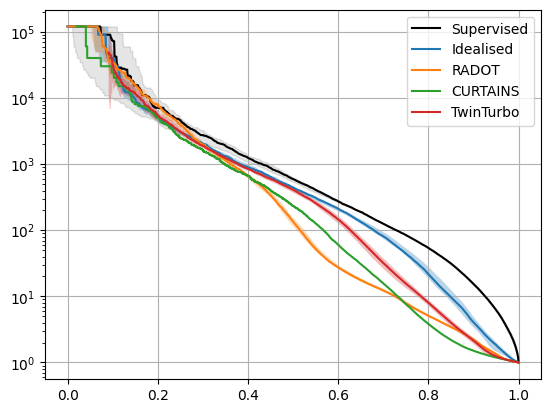

In [61]:
plt.figure()
plt.plot(super_rej["x"], super_rej["y_center"], label="Supervised", color="black")
plt.fill_between(super_rej["x"], super_rej["y_down"], super_rej["y_up"], alpha=0.1, color="black")
plt.plot(ideal_rej["x"], ideal_rej["y_center"], label="Idealised")
plt.fill_between(ideal_rej["x"], ideal_rej["y_down"], ideal_rej["y_up"], alpha=0.3)
plt.plot(radot1["tpr"], radot1["rej_center"], label="RADOT")
plt.fill_between(radot1["tpr"], radot1["rej_down"], radot1["rej_up"], alpha=0.3)
plt.plot(curtains_rej[0], curtains_rej[1], label="CURTAINS")
plt.fill_between(curtains_rej[0], curtains_rej[1]-0, curtains_rej[1]+0, alpha=0.3)
plt.plot(my_curver_rej[0], my_curver_rej[1], label="TwinTurbo")
plt.fill_between(my_curver_rej[0], my_curver_rej[1]-my_curver_rej[2], my_curver_rej[1]+my_curver_rej[2], alpha=0.3)
plt.yscale("log")
plt.grid()
plt.legend()
plt.savefig("/home/users/o/oleksiyu/WORK/hyperproject/plots/final2/inverse_rej.png")

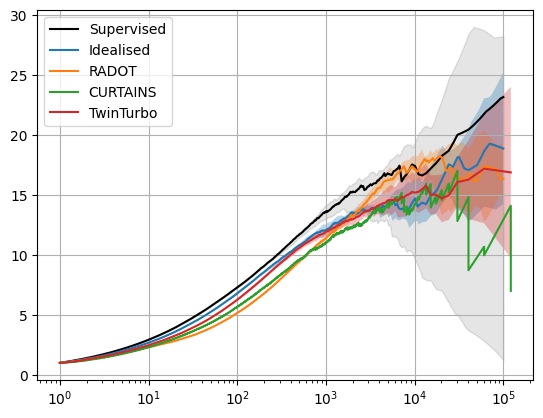

In [62]:
plt.figure()
plt.plot(super_sic["x"], super_sic["y_center"], label="Supervised", color="black")
plt.fill_between(super_sic["x"], super_sic["y_down"], super_sic["y_up"], alpha=0.1, color="black")
plt.plot(ideal_sic["x"], ideal_sic["y_center"], label="Idealised")
plt.fill_between(ideal_sic["x"], ideal_sic["y_down"], ideal_sic["y_up"], alpha=0.3)
plt.plot(radot2["rejection"], radot2["tpr_center"], label="RADOT")
plt.fill_between(radot2["rejection"], radot2["tpr_down"], radot2["tpr_up"], alpha=0.3)
plt.plot(curtains_sic[0], curtains_sic[1], label="CURTAINS")
plt.fill_between(curtains_sic[0], curtains_sic[1]-0, curtains_sic[1]+0, alpha=0.3)
plt.plot(my_curve_sic[0], my_curve_sic[1], label="TwinTurbo")
plt.fill_between(my_curve_sic[0], my_curve_sic[1]-my_curve_sic[2], my_curve_sic[1]+my_curve_sic[2], alpha=0.3)
plt.xscale("log")
plt.grid()
plt.legend()
plt.savefig("/home/users/o/oleksiyu/WORK/hyperproject/plots/final2/SIC.png")